In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("data/BTC_feature_data.csv", index_col="Unnamed: 0", parse_dates=True)

In [6]:
df.head()

,phigh_day_touch,plow_day_touch,phigh_night_touch,plow_night_touch,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
2017-08-17,0,0,0,0,-0.003549,0.036527,-0.003967,0.053105
2017-08-18,0,1,0,1,-0.011031,0.079103,0.015688,0.103984
2017-08-19,0,0,0,0,-0.039757,0.002082,-0.053687,-0.011809
2017-08-20,1,0,0,0,-0.013015,0.016905,0.004034,0.056156
2017-08-21,0,1,0,1,-0.012406,0.060697,0.007486,0.182350


Since we treat every row as an independent event we reset the index

In [18]:
df.reset_index(inplace=True, drop=True)

In [20]:
df.head(2)

,phigh_day_touch,plow_day_touch,phigh_night_touch,plow_night_touch,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
0,0,0,0,0,-0.003549,0.036527,-0.003967,0.053105
1,0,1,0,1,-0.011031,0.079103,0.015688,0.103984


In [11]:
for col in df.columns:
	print(col)
	print(df[col].unique()[:5])
	print(df[col].nunique())
	print()

phigh_day_touch
[0 1]
2

plow_day_touch
[0 1]
2

phigh_night_touch
[0 1]
2

plow_night_touch
[0 1]
2

ret_distance_phigh_day_open
[-0.00354945 -0.01103135 -0.03975672 -0.013015   -0.01240637]
1875

ret_distance_plow_day_open
[0.0365269  0.07910337 0.00208212 0.01690468 0.06069737]
1871

ret_distance_phigh_night_open
[-0.00396658  0.01568814 -0.05368694  0.00403416  0.00748599]
1875

ret_distance_plow_night_open
[ 0.05310537  0.10398442 -0.0118087   0.05615588  0.18235   ]
1875



## EDA
- Ranges of values
- Missing values
- Analysis of the target variable
- Feature importance analysis

In [4]:
categorical = ["phigh_day_touch", "plow_day_touch","phigh_night_touch", "plow_night_touch"]

numerical = ["ret_distance_phigh_day_open", "ret_distance_plow_day_open", 
            "ret_distance_phigh_night_open", "ret_distance_plow_night_open"]

### Ranges of values

In [12]:
df[numerical].describe().round(4)

,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
count,1874.0000,1874.0000,1874.0000,1874.0000
mean,-0.0148,0.0196,-0.0221,0.0273
std,0.0367,0.0396,0.0233,0.0291
min,-0.2370,-0.1978,-0.2330,0.0000
25%,-0.0298,0.0000,-0.0289,0.0098
50%,-0.0114,0.0147,-0.0141,0.0184
75%,0.0033,0.0371,-0.0072,0.0348
max,0.1430,0.2363,0.0000,0.3740


In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['ret_distance_plow_night_open'], bins=50)

The exploratory data analysis of the numerical features shows that the percentage distance between the high of the previous trading session and the open of the next session has a mean negative return of -0.0148 with standard deviation of 0.00367, the range of values is between -0.2370 and 0.143.

The results for the distance between the low of the previous day session and the open of the day shows a mean of 0.0196 wit standard deviation of 0.0396. The range of values are between -0.1978 and 0.2363.

Night session has interesting properties, the open of the day cannot be higher than the previous night high, and the open cannot be lower than the previous night low. By definition those distance has a left for the distance with previous night high and right skewed distribution for the distance between previous night low. 

### Missing values

In [18]:
df.isnull().sum()

phigh_day_touch                  0
plow_day_touch                   0
phigh_night_touch                0
plow_night_touch                 0
ret_distance_phigh_day_open      1
ret_distance_plow_day_open       1
ret_distance_phigh_night_open    1
ret_distance_plow_night_open     1
dtype: int64

In [20]:
df.head(3)

,phigh_day_touch,plow_day_touch,phigh_night_touch,plow_night_touch,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
2017-08-17,0,0,0,0,NaN,NaN,NaN,NaN
2017-08-18,0,1,0,1,-0.027313,0.011807,-0.027720,0.027991
2017-08-19,0,0,0,0,-0.072771,0.011737,-0.047719,0.035065


The missing values are due to being a lagged indicator that takes the previous day, so it is safe to omit the first row

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

phigh_day_touch                  0
plow_day_touch                   0
phigh_night_touch                0
plow_night_touch                 0
ret_distance_phigh_day_open      0
ret_distance_plow_day_open       0
ret_distance_phigh_night_open    0
ret_distance_plow_night_open     0
dtype: int64

### Target variable

Since we want to create four models to have four different targets we need to evaluate four different outcomes

In [24]:
for cat in categorical:
    print(df[cat].value_counts(normalize=True))

0    0.68143
1    0.31857
Name: phigh_day_touch, dtype: float64
0    0.697439
1    0.302561
Name: plow_day_touch, dtype: float64
0    0.628602
1    0.371398
Name: phigh_night_touch, dtype: float64
0    0.696905
1    0.303095
Name: plow_night_touch, dtype: float64


The first target feature is a binary outcome that evaluate if the price reach the previous day high, in the results 68% of the time we do reach the previous high, previous low is reach 70% of the time, and previous night high is reach 63% of the time and previous night low is reach 70% of the time.

### Feature importance

In [25]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.phigh_day_touch.values
y_val = df_val.phigh_day_touch.values

In [26]:
df_train_full[numerical].corrwith(df_train_full.phigh_day_touch).to_frame('correlation')

,correlation
ret_distance_phigh_day_open,0.204804
ret_distance_plow_day_open,0.190439
ret_distance_phigh_night_open,0.233205
ret_distance_plow_night_open,0.005932


In [27]:
df_train_full.groupby(by='phigh_day_touch')[numerical].mean()

,ret_distance_phigh_day_open,ret_distance_plow_day_open,ret_distance_phigh_night_open,ret_distance_plow_night_open
phigh_day_touch,,,,
0,-0.020053,0.014198,-0.02566,0.026443
1,-0.004053,0.030160,-0.01397,0.026783


<AxesSubplot:xlabel='ret_distance_phigh_day_open', ylabel='Count'>

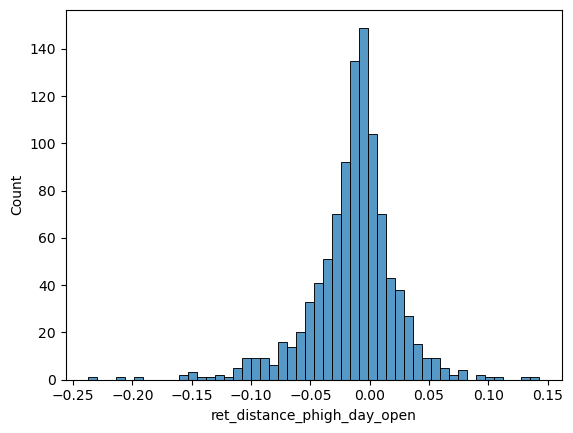

In [32]:
import seaborn as sns
import numpy as np

sns.histplot(df_train.ret_distance_phigh_day_open, bins=50)

<AxesSubplot:xlabel='ret_distance_plow_day_open', ylabel='Count'>

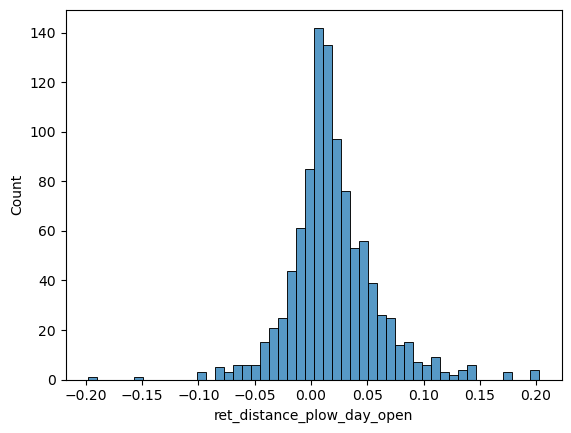

In [33]:
sns.histplot(df_train.ret_distance_plow_day_open, bins=50)

<AxesSubplot:xlabel='ret_distance_phigh_night_open', ylabel='Count'>

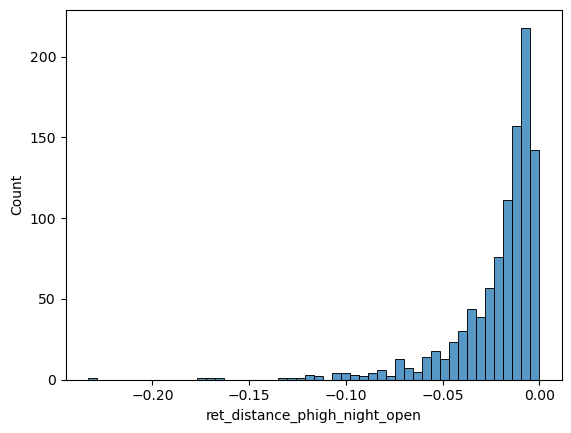

In [34]:
sns.histplot(df_train.ret_distance_phigh_night_open, bins=50)

<AxesSubplot:xlabel='ret_distance_plow_night_open', ylabel='Count'>

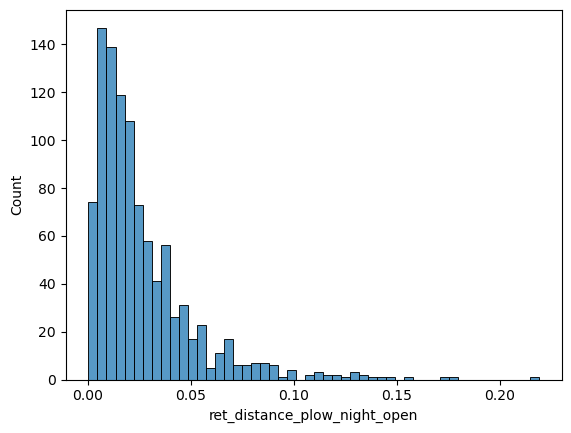

In [35]:
sns.histplot(df_train.ret_distance_plow_night_open, bins=50)

## Model Training

- Train a logistic regression model
- Train a Random Forest Model (Tune parameters)
- Tain a XGBosst Model (Tune parameters)

In [36]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

train_dicts = df_train[numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

test_dicts = df_test[numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)

### Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [47]:
y_pred = model.predict_proba(X_val)[:, 1]
phigh = y_pred > 0.5
(y_val == phigh).mean()

0.7151515151515152

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [45]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.821733
1,5,20,0.822435
2,5,30,0.827523
3,5,40,0.828495
4,5,50,0.828796


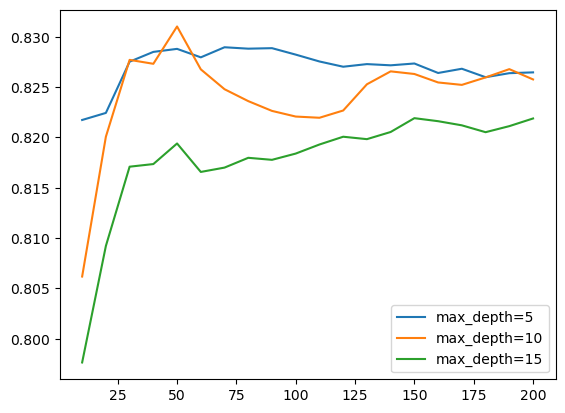

In [44]:
# Graphing 
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [48]:
# min_samples_leaf was also defined in 6.5, please take a look there! 
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=10,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

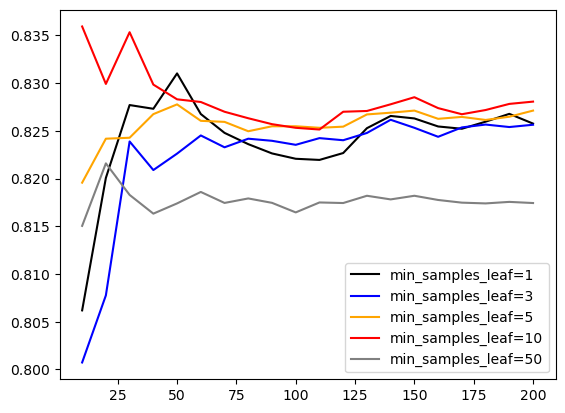

In [51]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [53]:
rf = RandomForestClassifier(n_estimators=27,
                            max_depth=10,
                            min_samples_leaf=10,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=27,
                       random_state=1)

In [55]:
y_pred = rf.predict_proba(X_val)[:, 1]
phigh = y_pred > 0.5
(y_val == phigh).mean()

0.793939393939394

In [56]:
import xgboost as xgb
# The DMatrix allows for the XGBoost model to train faster as the DMatrix is optimised for the model. 
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

c:\Users\Pastor\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8314300597026885

In [96]:
# Function for producing a dataframe
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [97]:
scores = {}

In [98]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [116]:
%%capture output

xgb_params = {
    'eta': 0.003, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                verbose_eval=5,
                evals=watchlist)

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [111]:
scores.keys()

dict_keys(['eta=1.0', 'eta=0.3', 'eta=0.1', 'eta=0.01', 'eta=0.001'])

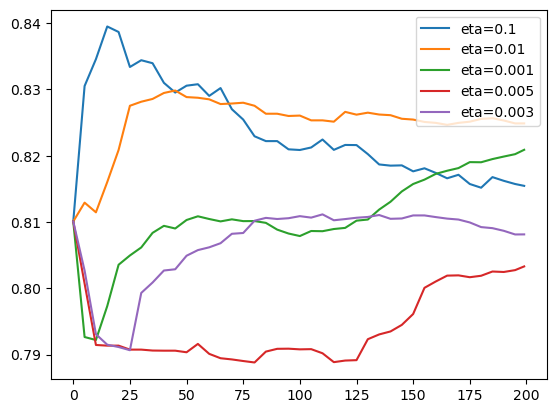

In [117]:
etas = ['eta=0.1', 'eta=0.01', 'eta=0.001', 'eta=0.005', 'eta=0.003']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label = eta)
plt.legend()

Optimal eta=0.01

In [73]:
import pickle
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [74]:
# Training

def train(df_train, y_train, C=1.0):
    dicts = df_train[numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [96]:
# validation
def cv_train(df_train, df_val, y_feature):
    scores = []
    for C in [0.01, 0.1, 1, 10]:
        print(f"Doing validation with C={C}")

        kfold = KFold(n_splits=5, shuffle=True, random_state=1)
        fold = 0
        for train_idx, val_idx in kfold.split(df_full_train):
            df_train = df_full_train.iloc[train_idx]
            df_val = df_full_train.iloc[val_idx]

            y_train = df_train[f"{y_feature}"].values
            y_val = df_val[f"{y_feature}"].values

            dv, model = train(df_train, y_train, C=C)
            y_pred = predict(df_val, dv, model)

            auc = roc_auc_score(y_val, y_pred)
            scores.append(auc)

            print(f'auc on fold {fold} is {auc}')
            fold += 1
            
    return scores



In [94]:
def val_results(scores, y_feature, C):

    print("Validation results:")
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

    dv, model = train(df_full_train, df_full_train[y_feature].values, C=C)
    y_pred = predict(df_test, dv, model)

    y_test = df_test[y_feature].values
    auc = roc_auc_score(y_test, y_pred)

    print(f'auc={auc}')

In [98]:
scores_m1 = cv_train(df_train, df_val, y_feature=categorical[0])

Doing validation with C=0.01
auc on fold 0 is 0.5966444270015699
auc on fold 1 is 0.5953689167974883
auc on fold 2 is 0.559138692803819
auc on fold 3 is 0.5779860482453805
auc on fold 4 is 0.5737792214707919
Doing validation with C=0.1
auc on fold 0 is 0.5864894034536892
auc on fold 1 is 0.5987048665620094
auc on fold 2 is 0.5378599360113757
auc on fold 3 is 0.5425741519782736
auc on fold 4 is 0.5840566590340275
Doing validation with C=1
auc on fold 0 is 0.5895310047095761
auc on fold 1 is 0.6019917582417582
auc on fold 2 is 0.54126250571327
auc on fold 3 is 0.5437456733585387
auc on fold 4 is 0.5868257095691997
Doing validation with C=10
auc on fold 0 is 0.6054748822605965
auc on fold 1 is 0.6179846938775511
auc on fold 2 is 0.5805190188410949
auc on fold 3 is 0.5644070504286703
auc on fold 4 is 0.6057830555407636


In [99]:
scores_m2 = cv_train(df_train, df_val, y_feature=categorical[1])

Doing validation with C=0.01
auc on fold 0 is 0.5685938392810763
auc on fold 1 is 0.6225941002060404
auc on fold 2 is 0.5705824820691154
auc on fold 3 is 0.5293987007939591
auc on fold 4 is 0.5989191729323308
Doing validation with C=0.1
auc on fold 0 is 0.5685418939275881
auc on fold 1 is 0.6288255691240766
auc on fold 2 is 0.5649315366224733
auc on fold 3 is 0.5402254178002331
auc on fold 4 is 0.5885220864661653
Doing validation with C=1
auc on fold 0 is 0.5798140356345125
auc on fold 1 is 0.6336499321573948
auc on fold 2 is 0.5745490110845469
auc on fold 3 is 0.5501637887957359
auc on fold 4 is 0.5994478383458646
Doing validation with C=10
auc on fold 0 is 0.6212144823645525
auc on fold 1 is 0.6305341976983768
auc on fold 2 is 0.6245924798956749
auc on fold 3 is 0.5993559491421909
auc on fold 4 is 0.648672462406015


In [100]:
scores_m3 = cv_train(df_train, df_val, y_feature=categorical[2])

Doing validation with C=0.01
auc on fold 0 is 0.7627797067901235
auc on fold 1 is 0.715496368038741
auc on fold 2 is 0.6678381458966565
auc on fold 3 is 0.7635701102645401
auc on fold 4 is 0.7083272283272283
Doing validation with C=0.1
auc on fold 0 is 0.7686631944444444
auc on fold 1 is 0.7131681877444589
auc on fold 2 is 0.665036094224924
auc on fold 3 is 0.768917703847428
auc on fold 4 is 0.708962148962149
Doing validation with C=1
auc on fold 0 is 0.7767168209876544
auc on fold 1 is 0.718848947662507
auc on fold 2 is 0.6708776595744681
auc on fold 3 is 0.774691211963466
auc on fold 4 is 0.714969474969475
Doing validation with C=10
auc on fold 0 is 0.8082079475308642
auc on fold 1 is 0.7520953622648539
auc on fold 2 is 0.7104863221884498
auc on fold 3 is 0.7957503194358998
auc on fold 4 is 0.7440293040293041


In [101]:
scores_m4 = cv_train(df_train, df_val, y_feature=categorical[3])

Doing validation with C=0.01
auc on fold 0 is 0.7498978758169934
auc on fold 1 is 0.7328248130935543
auc on fold 2 is 0.7734920634920636
auc on fold 3 is 0.7921693121693122
auc on fold 4 is 0.7365741776683822
Doing validation with C=0.1
auc on fold 0 is 0.7495404411764706
auc on fold 1 is 0.7438371388159224
auc on fold 2 is 0.783015873015873
auc on fold 3 is 0.7902645502645502
auc on fold 4 is 0.7406578652942493
Doing validation with C=1
auc on fold 0 is 0.7581699346405228
auc on fold 1 is 0.754192766215397
auc on fold 2 is 0.7935449735449736
auc on fold 3 is 0.797883597883598
auc on fold 4 is 0.7492727679570373
Doing validation with C=10
auc on fold 0 is 0.8034109477124182
auc on fold 1 is 0.7993028894726206
auc on fold 2 is 0.8368253968253969
auc on fold 3 is 0.8316931216931216
auc on fold 4 is 0.7906690534795257


All models perform better with C = 10

In [106]:
print(categorical[0])
val_results(scores_m1, categorical[0], 10)
print(categorical[1])
val_results(scores_m2, categorical[1], 10)
print(categorical[2])
val_results(scores_m3, categorical[2], 10)
print(categorical[3])
val_results(scores_m4, categorical[3], 10)

phigh_day_touch
Validation results:
C=10 0.580 +- 0.023
auc=0.5715870135107884
plow_day_touch
Validation results:
C=10 0.592 +- 0.033
auc=0.6297645211930927
phigh_night_touch
Validation results:
C=10 0.735 +- 0.041
auc=0.7347416413373861
plow_night_touch
Validation results:
C=10 0.775 +- 0.030
auc=0.8262493210211841


In [108]:
for i in categorical:
    dv, model = train(df_full_train, df_full_train[i].values, C=10)
    output_file = f'model_{i}_C=10.bin'

    with open(output_file, 'wb') as f_out:
        pickle.dump((dv, model), f_out)